<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN240_DataScience_671/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 - Visualization and EDA

## DUE: Friday 20th September 23:59

- There are 25 questions in total. 5 points total.

In this homework, we will explore two datasets to answer questions.

The first dataset is about vaccine. The homework will walk you through the process of answering questions about vaccine effectiveness.

The second dataset is about diamonds from the lecture. We continue to explore it to answer various questions about diamonds.

## Vaccine Data

- Our question is does vaccine help reduce/eliminate dieseases?
- We use the vaccine data from [Project Tycho](https://www.tycho.pitt.edu/) to answer this question.
- The data include weekly reported counts for seven diseases from 1928 to 2011, from all fifty USA states.
- Data can be found [here](https://github.com/yongsa-nut/TU_CN240_DataScience_671/blob/main/Data/us_contagious_diseases.csv).

In [ ]:
import pandas as pd
from plotnine import *
vaccine = pd.read_csv('/content/us_contagious_diseases.csv')
vaccine.head()

In [ ]:
vaccine.shape

### Q1a: How many diesease is in this dataset?

- First, we will check what diseases are in the dataset

In [ ]:
diseases = ...
diseases

### Q1b: Creating a subset of the dataset

- We will be looking at `Measles` (โรคหัด) first.
- Additionally, we will not include 'Alaska' and 'Hawaii' states in our analysis since they only became states in the late 1950s.
- Create a new DataFrame with only 'Measles'

In [ ]:
df_measles = ...
# check your new df
print(df_measles['disease'].value_counts())
print(df_measles['state'].value_counts().reset_index().sort_values('state'))

### Q1c: Report Rate per year.

- In the dataset, we have a variable, `count`, representing the number of reported cases (in that state at that year).
- However, we cannot simply use `count` directly to show that vaccines help reduce the number of cases.
- There are two reasons for this dataset:
  - First, `count` came from weekly reports but not every week were reported. We have a variable `weeks_reporting` which indicates how many weeks of the year data was reported.  
  - Second, the number of cases will depend on the number of population. Therefore, we will need to adjust for the population, using `population`.

- In sum, what we want is the **rate of this disease** that takes into account of population and weeks report.
- To make the rate easier to interpret, we will do it per 10,000 population.
- The rate of cases per 10000 can be calculated as follows: $\frac{\text{count}*10000}{\text{population}}*\frac{52}{\text{weeks_report}}$

Your results should look like this:
```
	        rate
2346	34.143872
2347	10.645853
2348	15.705255
2349	31.520594
2350	0.790503
dtype: float64
```

In [ ]:
df_measles.loc[:,'rate'] = ...
df_measles['rate'].head()

### Q1d-e: Trend Plot

- Now that we have `rate`, we can answer our question, does vaccine help?
- The vaccine for measles was introduced in USA in 1963.
- This means we want to see how the rate of measles changes over time, especially before and after the vaccine was introduced.
- Let's check one state first. Let look at California only.
- For this question, create a time series plot where x-axis is `year` and y-axis is `rate`. Use `geom_line` for this question.
  - Additionally, add a vertical blue line at 1963 to indicate when the vaccine was introduce. Here is the syntax, `geom_vline(xintercept = 1963, color='blue')` See the [documentation](https://plotnine.org/reference/geom_vline.html).
  - Update y-axis to `Cases per 10,000`

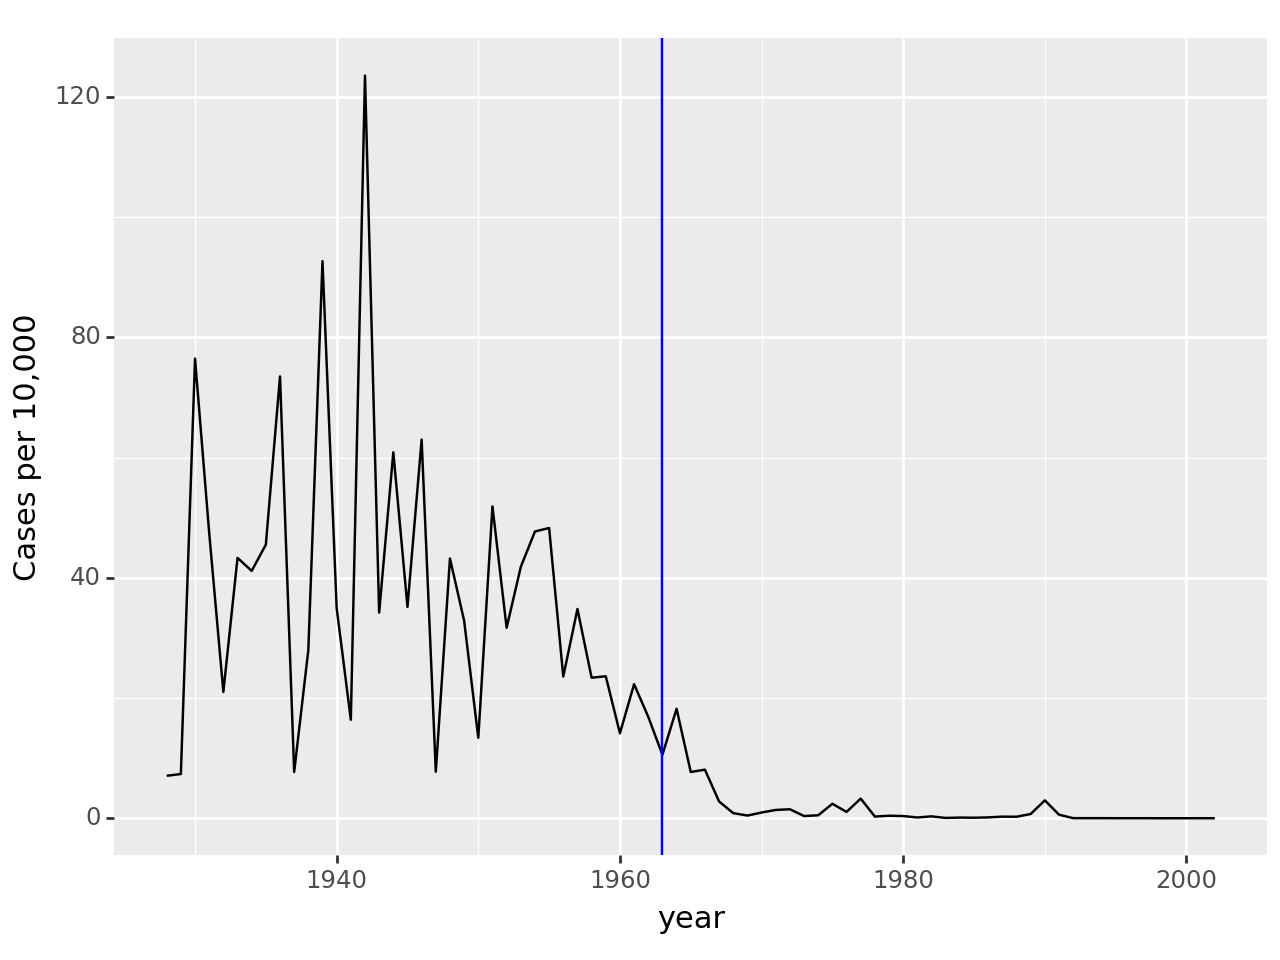

In [ ]:
# Check the plot below

In [ ]:
df_measles_CA = ...
g_measles_CA = ...
print(g_measles_CA)

<br>

---

## Heatmaps

### Q2a: Heatmaps
- How should we should all states in one plot?
- We have three variables: year, state, and rate.
- `year` is a numerical variable and we want to be on the x-axis. `state` is a categorical variable and `rate` is a numerical variable.
- One plot that is suitable for this heatmap where `state` is on y-axis and `rate` is color/heat.
- To plot a heatmap, we can use `geom_tile()` ([Documentation](https://plotnine.org/reference/geom_tile.html))
- Add `geom_vline` to indicate when the vaccine was introduced.

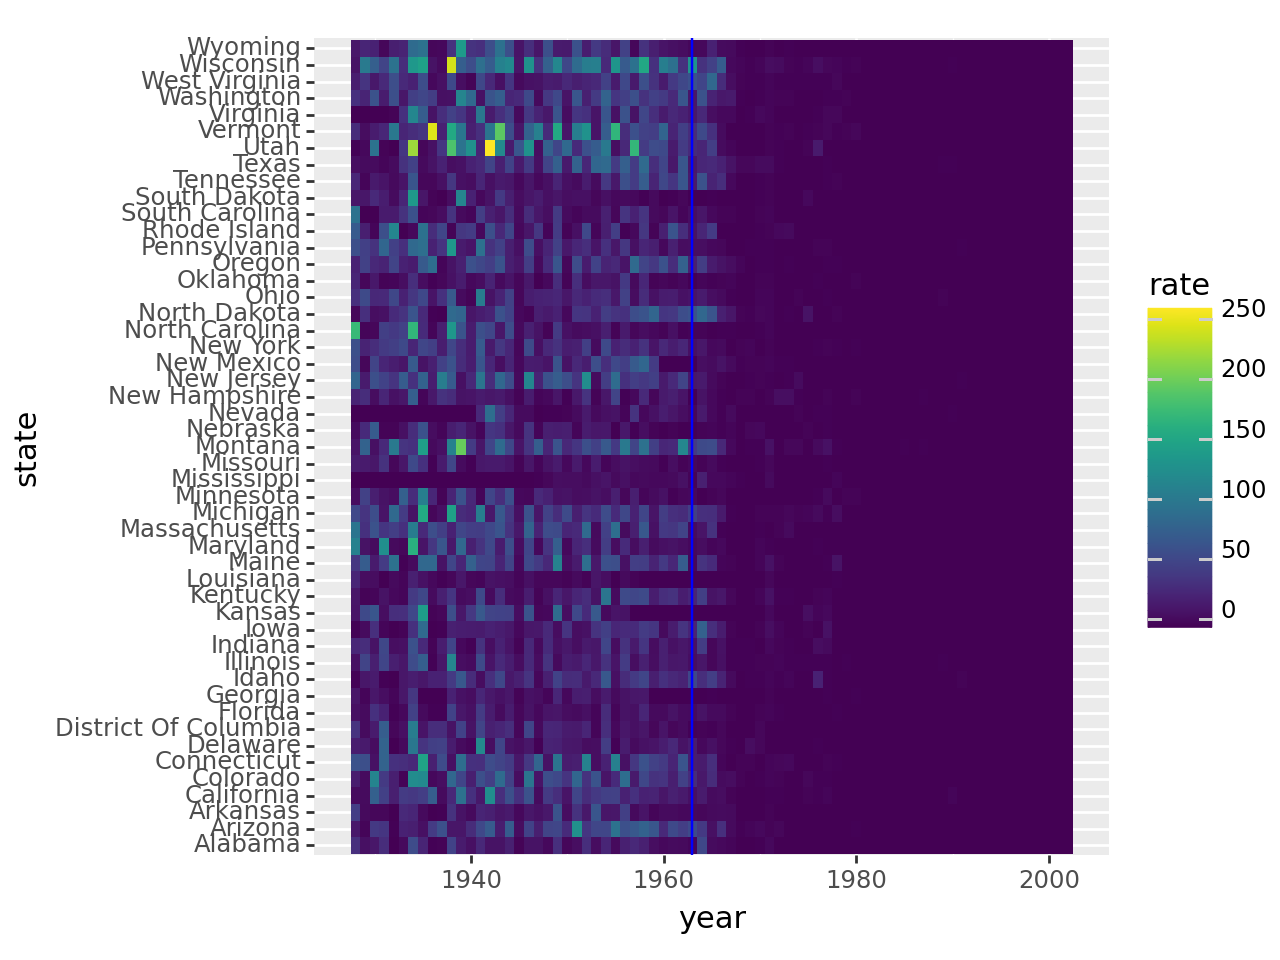

In [ ]:
# See the plot below

In [ ]:
g_heatmap = ...
print(g_heatmap)

### Q2b-c: Polishing Heatmap

- The default heatmap looks quite bad. There are several ways to improve this. This question will walk you through several aspects that we can do.


1.   We can change border's color (`color` of `geom_tile`) from none to `gray` to make the year cleaner to read.
2. We will get rid off the extra space before and after the x-axis range. We can do by using `scale_x_continuous(expand = [0,0])`. (See [documentation](https://plotnine.org/reference/scale_x_continuous.html))
3. We will change the heatmap color.
  - We want the zero rate to be `white` and maximum rate to be `red`.
  - Additionally, we will transform the scale to square root of rate before evenly divide the specturm of color. This makes the color distribution emphasizes the high rate more (try it without this transform to see the different).  
  - To accomplish all this, add `scale_fill_gradient(low='white', high='red', trans = 'sqrt')`.
  - See [documentation](https://plotnine.org/reference/scale_fill_gradient.html)
4. Increase the plot size to 8 x 6 inches.
5. Finally, add the title ('Measles') and remove the x and y axis labels since it's clear from the context what they are.



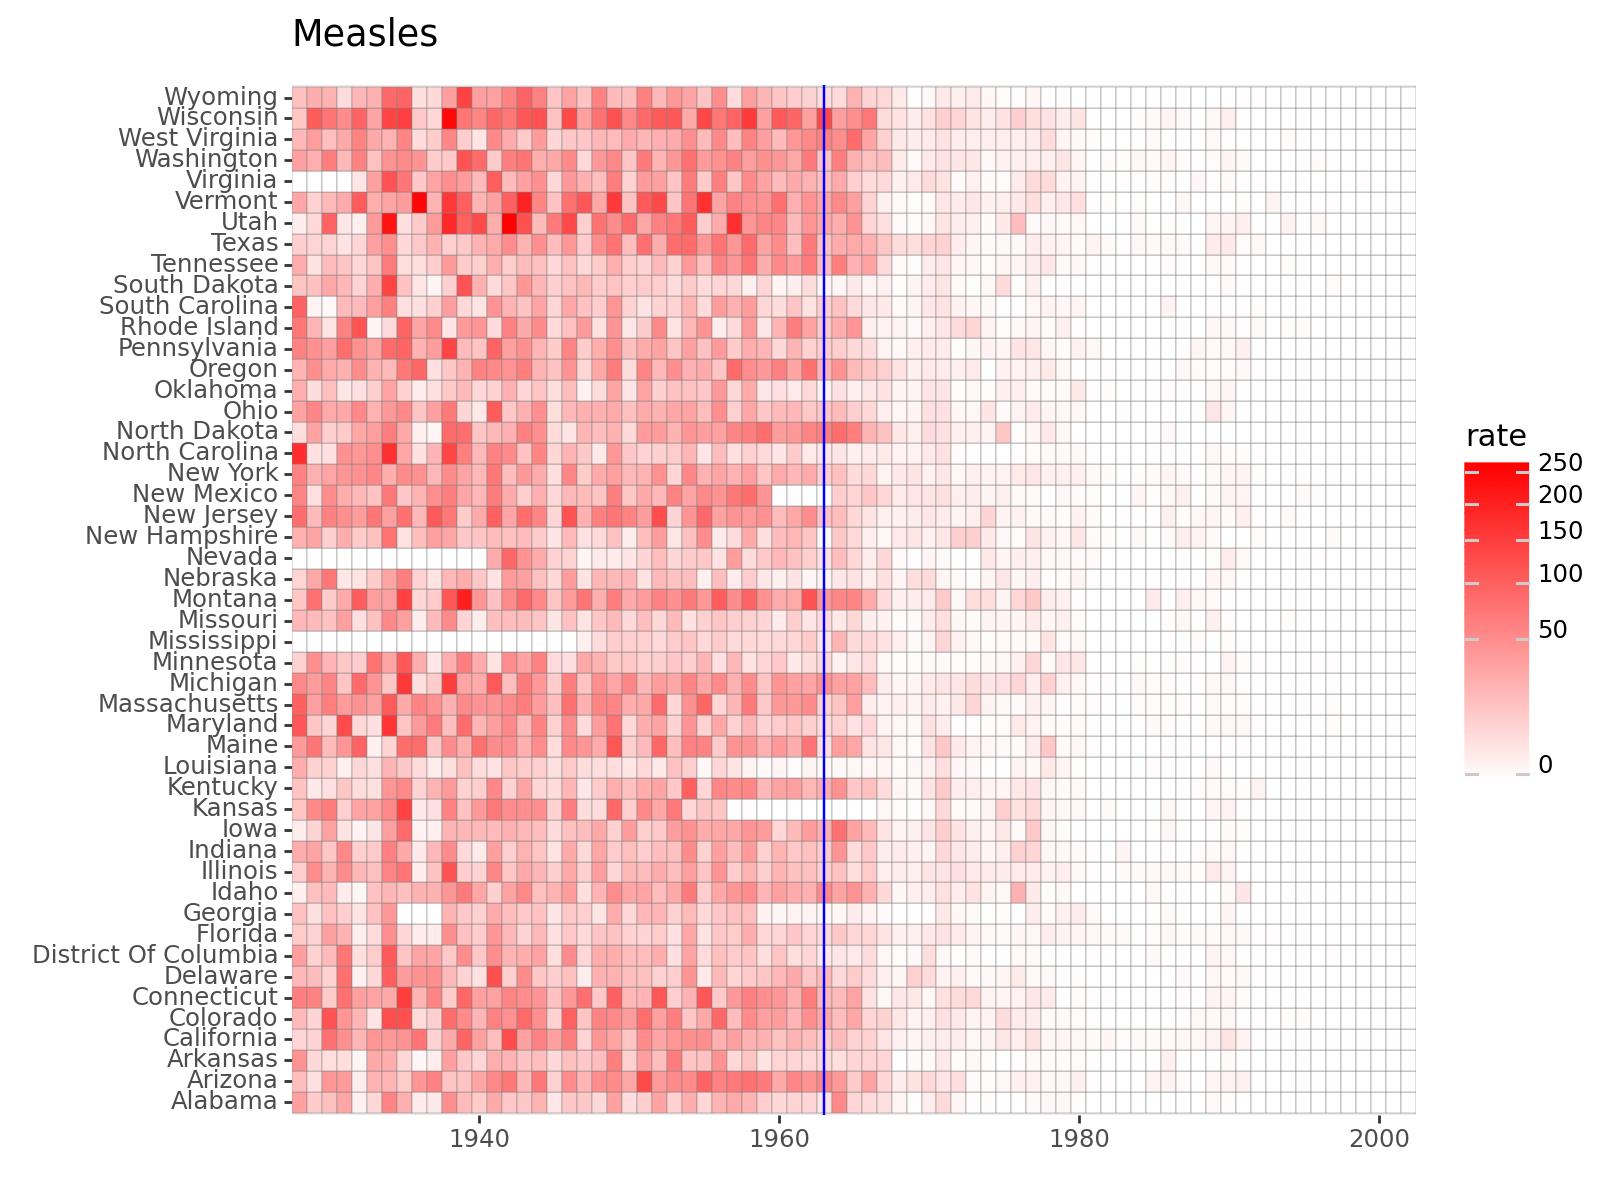

In [ ]:
# See the plot below

In [ ]:
g_heatmap = ...

print(g_heatmap)

### Q2d: Checking the plot

- The plot suggests that after the vaccines was introduced, the rate of measles across all states substaintially reduced and evetually got to zero. (Can we conclude from this plot that vaccine actually eliminate measles? Why or why not?)
- Take a look at the plot carefuly. Did you see a few states (Nevada, Mississippi, and Virginia) have several white cells early on?
- What happened there?
- To answer this question, let's check the data.
- Display the data of the three states (Nevada, Mississippi, and Virginia) only before 1940.

In [ ]:
df_measles_NMV = ...
display(df_measles_NMV)

### Q2e: Updating Our DataFrame

- Did you notice that some of them (specifically those with white cells) have 0 `weeks_reporting`? (and so count is 0 and rate is, therefore, 0.) What does that mean?
- It means that we actually don't have data report for those years and states.
- It would be more appropriate to say that those are missing data!
- We should change the rate of those cells to `NaN` by setting it to `pd.NA`.
- Doing so, we can have a different color to indicate missing data. The default color for missing data is grey (`na_value = "#7F7F7F"`). (See `scale_fill_gradient` [documentation](https://plotnine.org/reference/scale_fill_gradient.html))
- In the code block below, set all `rate` rows with `week_reportings` equal to 0 to `pd.NA`.

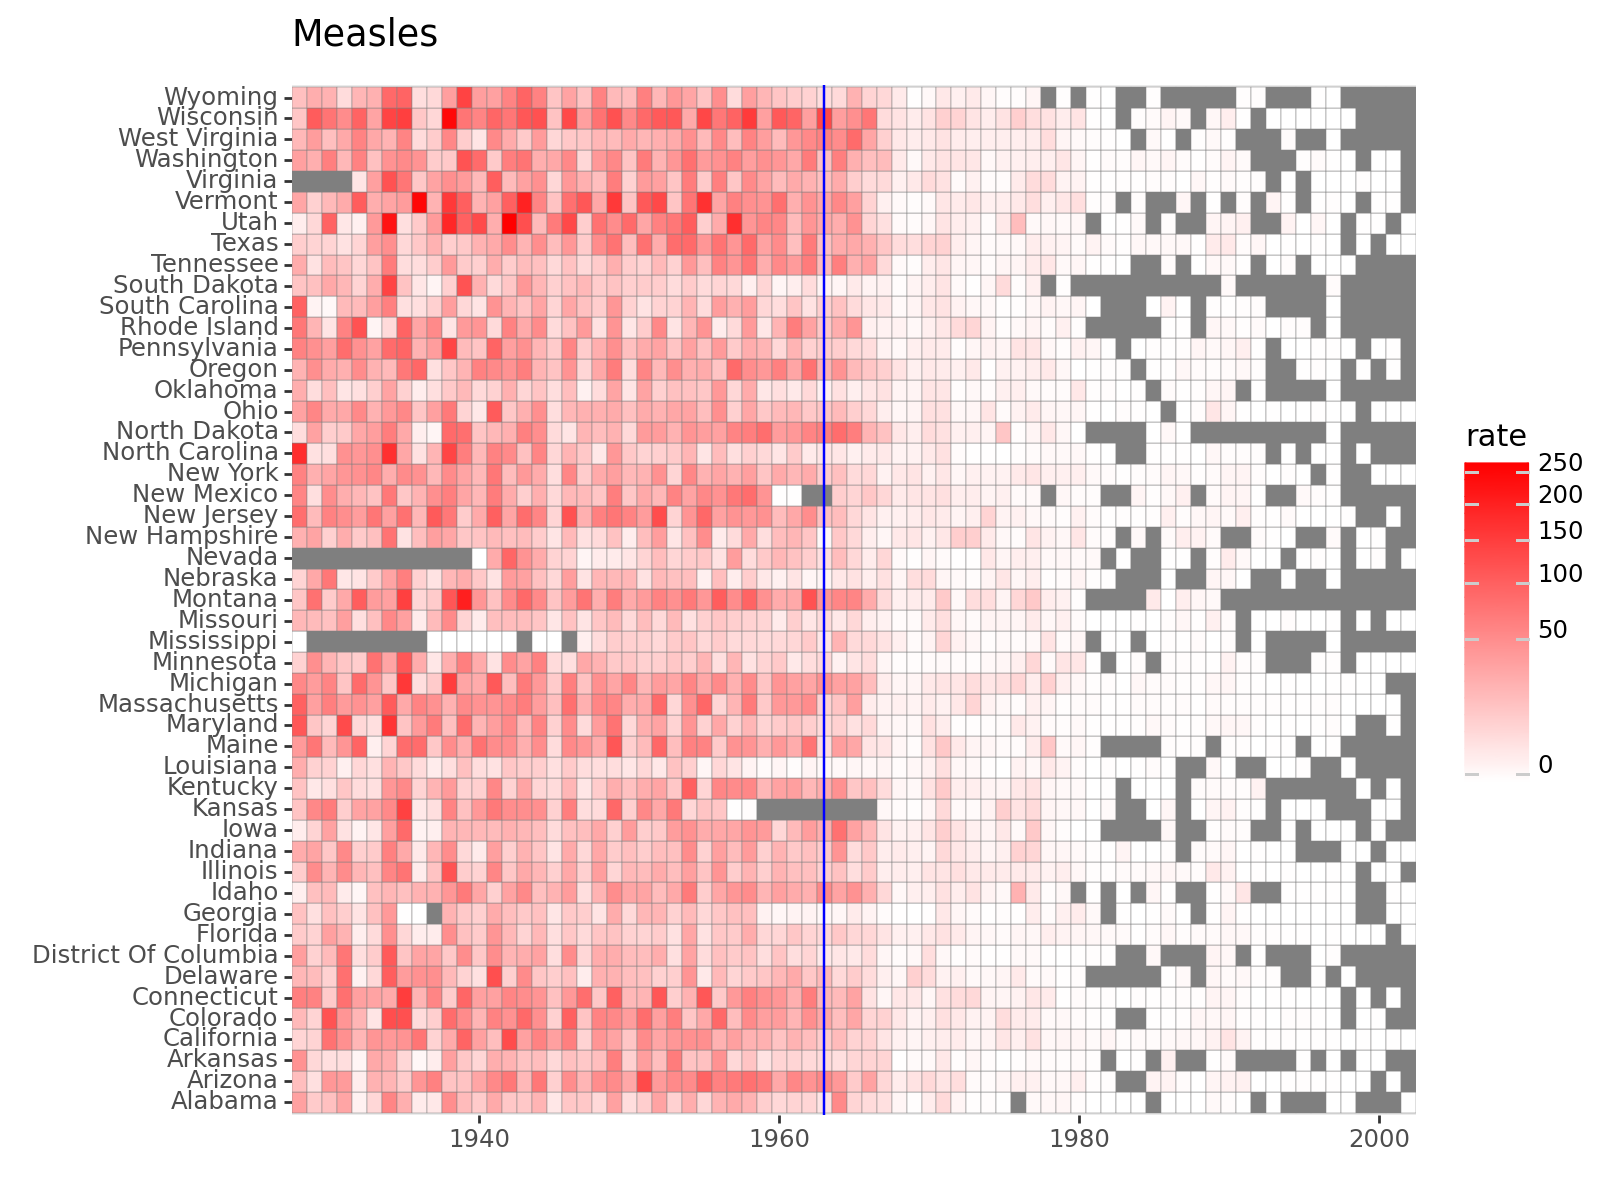

In [ ]:
# Set rate to NA if weeks_reporting == 0
...

# copy your answer from 2b-c and put it below
g_heatmap = ...
print(g_heatmap)

- We see that there are more missing reports in 2000s. This is because they stop recording it since measles is now gone.

<br>

---

## Multiple lines in one plot

- Heatmap makes it quite clear about the contribution of vaccines. For showing the trend, it is actually a decent plot.
- However, as we discussed in class, gradient is not a good way to show the quantity as it's hard (or impossible) to accurately read the actual rate.
- In this section, we will explore another plot by plotting all the states as lines similar to Q1d-e but in one plot.

### Q3a: Line plot
- Create a line plot where x-axis is `year`, y-axis is `rate`, and group is `state`.
- For the line, set the color to `grey`, alpha to `0.2` and size to `1`.
- Add `scale_y_continuous(trans = "sqrt", breaks = [5, 25, 125, 275])` to create a transformed y-axis.
- Add a vline at 1963.
- Finally, add a title, 'Measles cases per 10,000 by state'

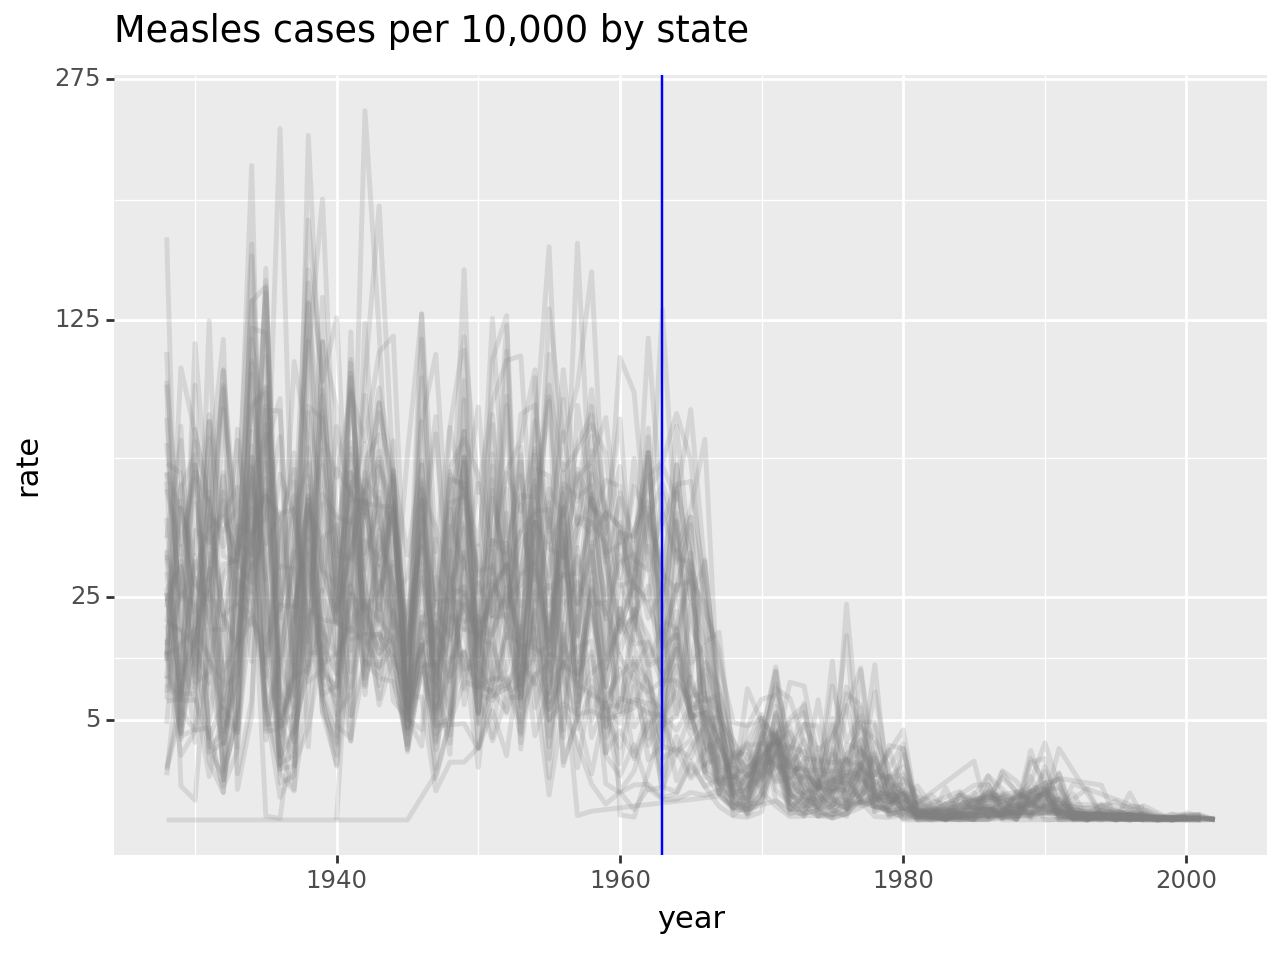

In [ ]:
# See the plot below

In [ ]:
# remove missing values from the previous section
df_measles_filtered = df_measles.dropna()
g_lines = ...

print(g_lines)

### Mean Rate

- The previous graph can be improved in various ways.
- We will two improvements in this homework.
- The first one is to plot the mean rate across all states. This will show how the average change over time.
- To do this, we will add a line in the previous plot to show the mean.

### Q3b: Calculate mean rate
- In order to create a mean line, we first need a new DataFrame for the line.
- The DataFrame contains two columns: `year` and `rate` where `rate` is the mean rate across all states.
- For this question, use `groupby` to create this new dataset.
- Don't forget to `reset_index()` to get the column `year` back.

In [ ]:
mean_rate = ...
mean_rate

### Q3c: Adding a mean line
- Add a new line to the plot in Q3a.
- This line should use the `mean_rate` DataFrame from Q3b as a dataset and has its own `aes()` Make this line with `size = 1`.
- You will need to redo the whole plot. The new plot should have two `geom_line` - one with `df_measles_filtered` as a data and a new mean line with `mean_rate` as a data.
- Everything else remains the same.

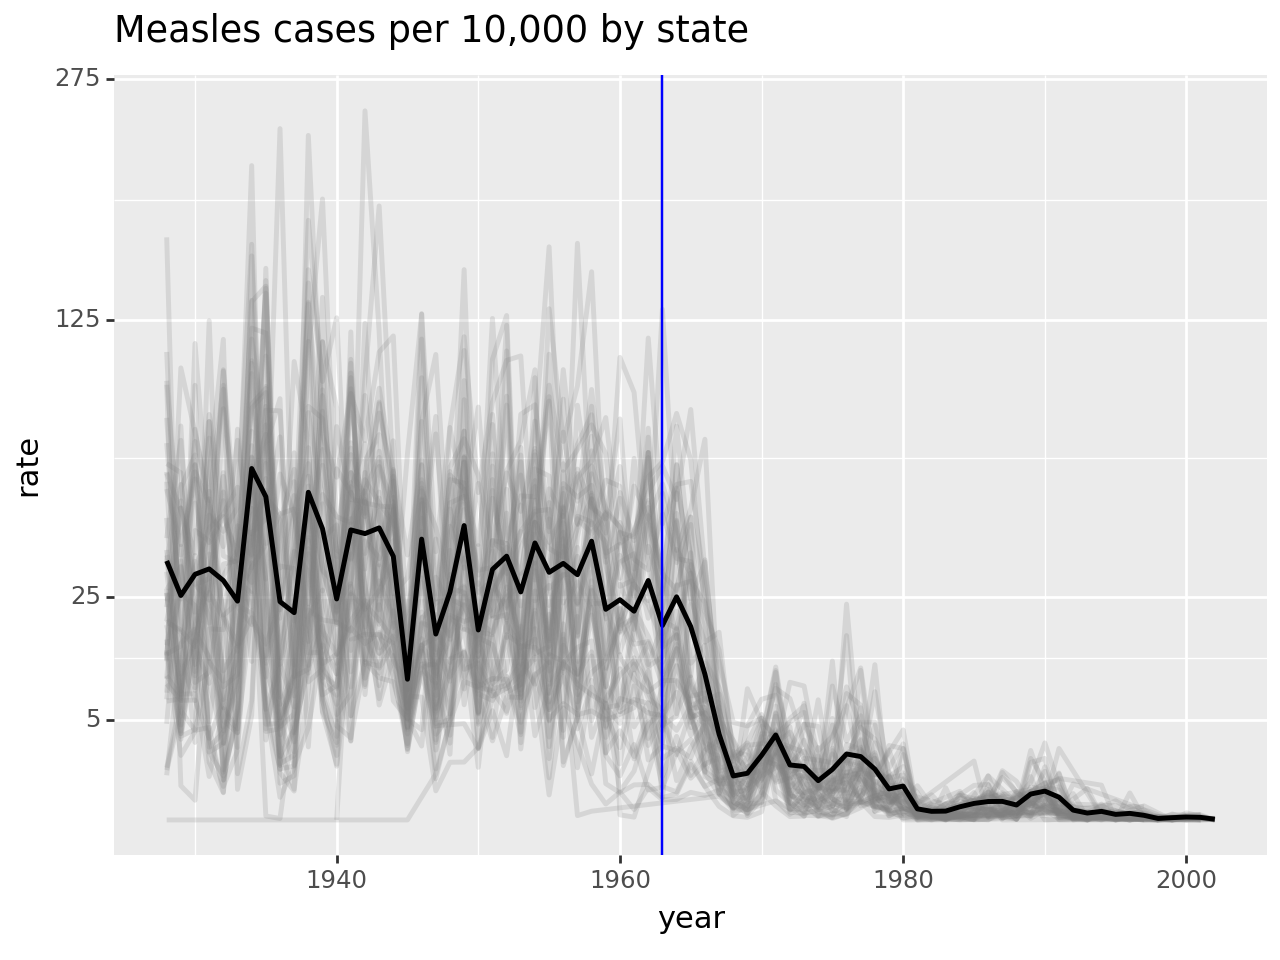

In [ ]:
# Check the plot below

In [ ]:
g_lines = ...

print(g_lines)

### Q3d: Adding a label

- Now that we have a mean line, we want to add a label to indicate it too.
- Add `geom_label` into the previous graph that says 'US Average'.
- `geom_label` is similar to `geom_text` but with a background.
- You have two ways to do this:
  - Create a new DataFrame and pass it in `geom_label` (see the slide).
  - Alternatively, you can simply call it withput a dataset like this `geom_label(aes(x = ..., y=...), label ='US_Average')`
- Try to position it nicely.


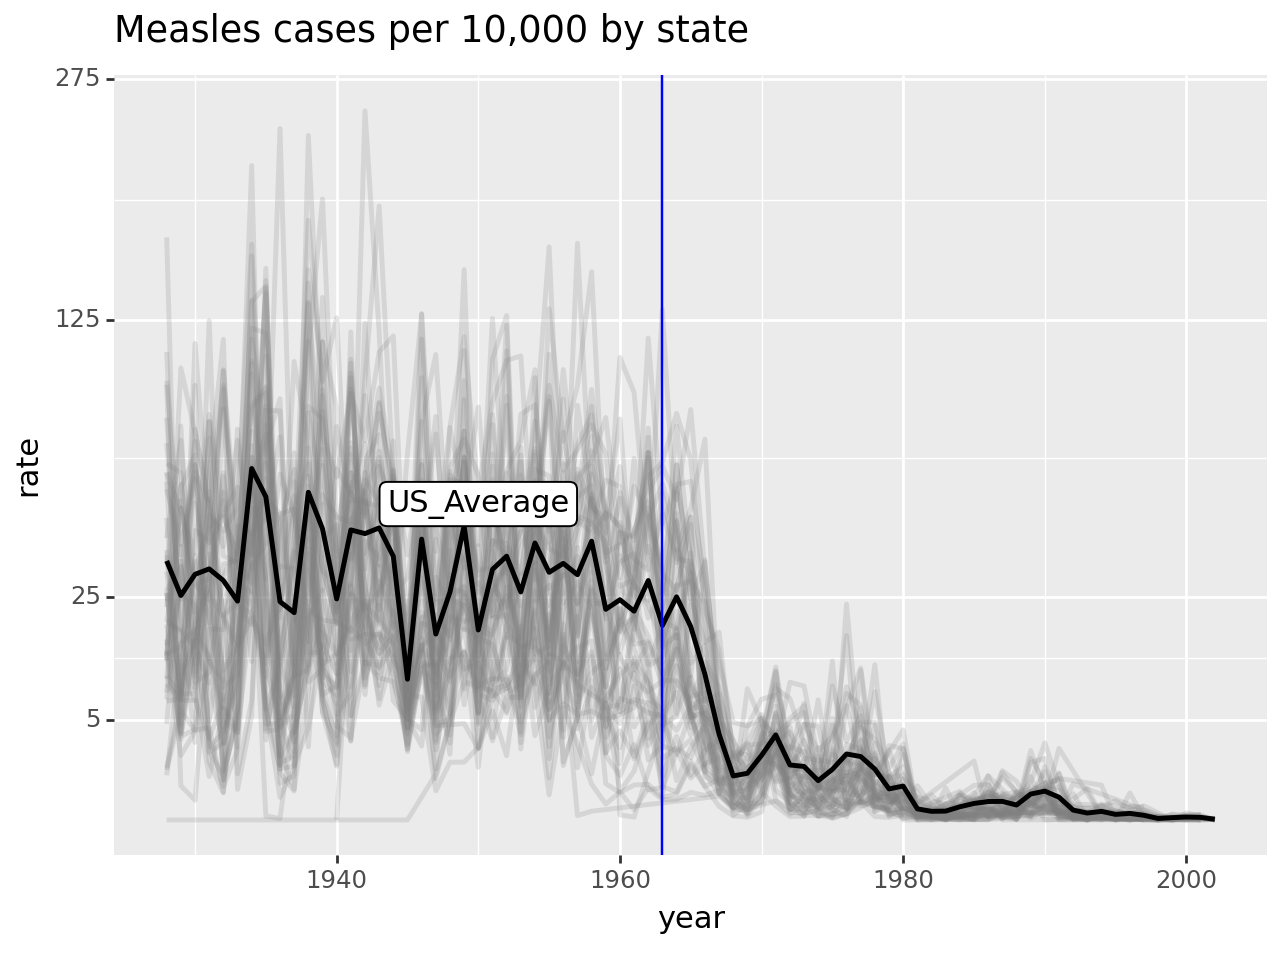

In [ ]:
# Check the plot below.

In [ ]:
g_lines = ...
print(g_lines)

### Q3e-f: Showing a few states
- One way to make this graph better is to show one or two chosen states.
- Add two lines to highlight two states with labels. The two lines should have two different colors.
- You can choose the two states.


<br>

---

## Diamond Dataset

- For the rest of this homework, we will continue exploring `diamond` dataset from the lecture.
- The main question that we want to answer is the relationship between price and other features.
- Here is the [documentation](https://plotnine.org/reference/diamonds.html) for this dataset.

In [ ]:
from plotnine.data import diamonds
diamonds.head()

In [ ]:
diamonds.shape

- During the lecture, we explored a few relationships of diamond's variables.
- We looked at the relationship between `price` and `carat` (the weight of diamond).

In [ ]:
smaller = diamonds[diamonds['carat'] < 3] # we limit our exploration to only small diamonds
g_price_carat = ggplot(smaller, aes('price','carat')) + geom_point()
print(g_price_carat)

- We see that as carat increases, the price also increases.
- Next, we look at the relationship between `price` and `cut` (quality)

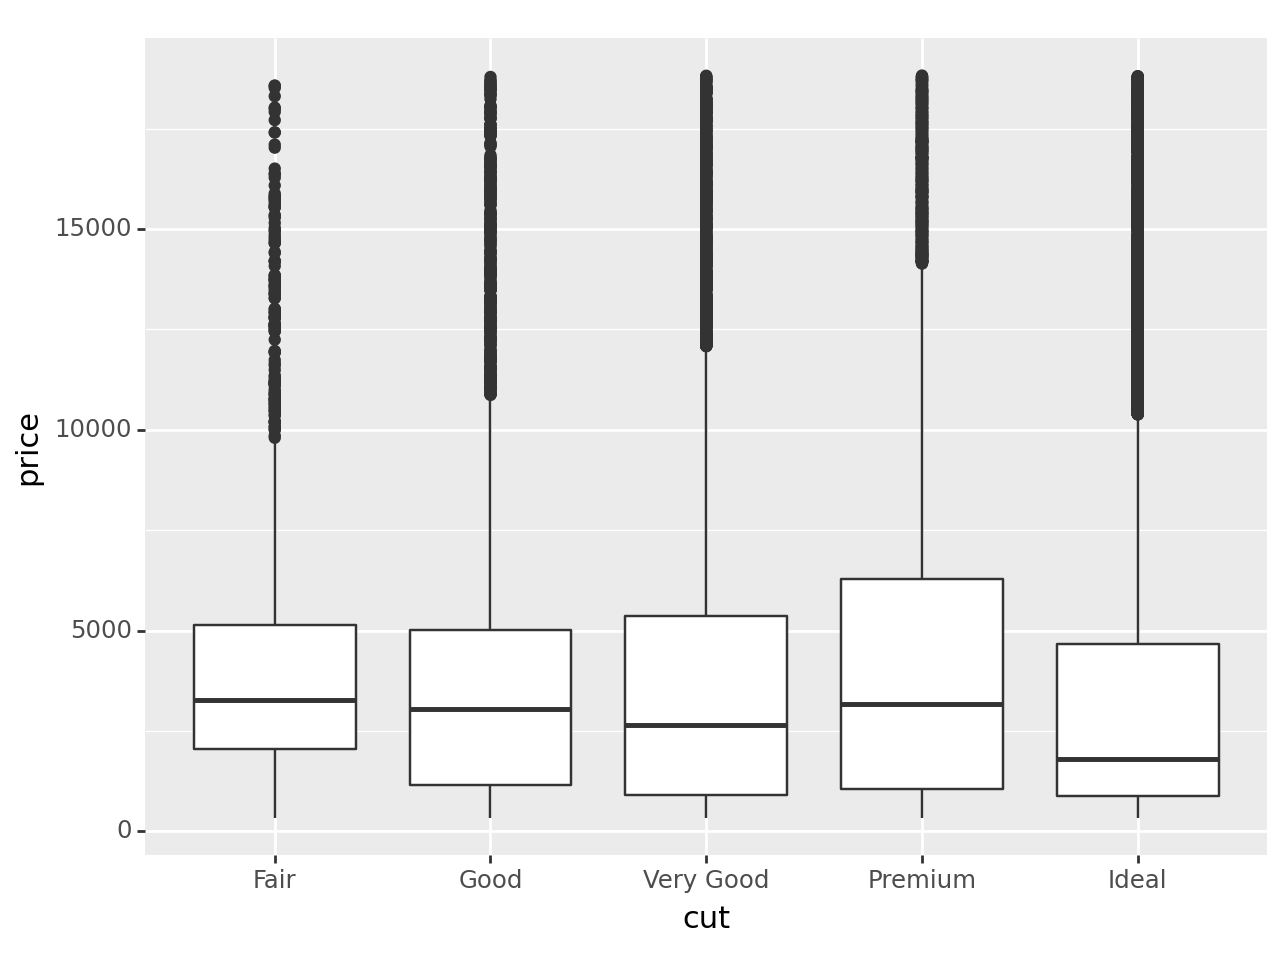

In [ ]:
g_price_cut = ggplot(smaller, aes(y='price', x='cut')) + geom_boxplot()
print(g_price_cut)

- Looking at this plot, we were puzzled why the medain of fair diamonds is hidher than ideal diamonds.
- We will explore this further in this homework.

- Before we drive further, let's step back and check other features in the dataset.

| Column |	Description |
| -----  | --------------|
| price	 | price in US dollars ($326-$18,823) |
| carat	 | weight of the diamond (0.2-5.01) |
| cut	   | quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color	 | diamond colour, from J (worst) to D (best) |
| clarity |	a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)) |
| x      |	length in mm (0-10.74) |
| y      | 	width in mm (0-58.9) |
| z      |	depth in mm (0-31.8) |
| depth  |	total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)|
| table	 | width of top of diamond relative to widest point (43-95) |

- Looking at these variables carefully, you may notice two types of variables besides price: those about quality and those about size/weight of diamonds.

- So you may have a question whether or not those in the same group are related to each other or not. If so, maybe we do not need to check all of them but just one of them.

### Q4a-c: `carat` and `x`, `y`, `z`

- Let's check out the relationships between `carat` and `x`, `y`, and `z`.
- Create three plots that show the three relationships


In [ ]:
# carat and x


In [ ]:
# carat and y


In [ ]:
# carat and z


- You should see that `carat` and `x`, `y`, and `z` are closely related.
- There are some outliers but there are not many and will simply ignore them for this homework. These outliers can distost the plots so the relationship may not be as clear.
- This makes sense since the size of diamond should related to its weight.

### The relationship between `cut` and `color` and `clarity`
- We want to do the same for `cut` and `color` and `clarity`.
- All three are ordered categorical variables so it can be quite hard to see the relationship.
- What we will do here instead is to convert orderd categorical variables to numerical variables by mapping each categorical to number in order.
- For instance, for `cut` there are 5 categories from `fair` to `ideal`. We can map `fair` to 1 and `ideal` to 5.
- When we are doing this kinda of conversion, we assume that going from one group to another group in order is the same for all groups (i.e., from `Fair` to `Good` is the same as `Good` to `Very Good`).


### Q5a - Convert `color` and `clarity` to numerical
- For this question we will only convert `color` and `clarity` to numberical variables.
- Specifically, we will create two new columns, `color_num` and `clarity_num` that map the lowest color/clarity to 0 and highest color/clarity to the number of color/clarity - 1.
- We can easily do this using `.cat.codes`

In [ ]:
smaller.loc[:,'color_num'] = smaller['color'].cat.codes
smaller.loc[:,'clarity_num'] = ... # Fill in your answer here
# We can check that they are the same (See the table for ranking)
print(smaller['clarity'].value_counts())
print(smaller['clarity_num'].value_counts())

### Q5b - Ploting `cut` vs. `color_num` and `clarity_num`
- We can now plot the relationship between `cut` and `color_num` and `clarity_num`.
- We will use `box_plot()` for this question.

In [ ]:
# `cut` and `color_num`
...

In [ ]:
# `cut` and `clarity_num`
...

- We see that there is no clear relationship between `color` and `cut`.
- For `clarity` and `cut`, we should see that `fair` has lower clarity thatn `ideal`.
- For this homework, we will simply focus on `cut` but this means we may want to further explore `color` together with `cut` too.

<br>

---

### `Price` and `Cut`

- We will now take a closer look at the relationship between `price` and `cut` by breaking by `carat`.
- Recall that, when looking at `price` and `cut` only, fair diamonds has higher median price than ideal diamonds. We will try to tease this apart.

### Q6a - Scatter plot

- Let's start by creating a scatter plot where x is `price`, y is `carat` and color is `cut`.

In [ ]:
g_p_carat_cut = ...
print(g_p_carat_cut)

### Q6b - Only `Fair` vs. `Ideal`
- The last graph is just too hard to understand. There are simply too many points.
- We will instead only focus on `Fair` and `Ideal`.
- Additionally, we will reduce the size of points to `0.2`.
- Complete the code below to create a new df with only `Fair` and `Ideal`

In [ ]:
smaller_FI = ... # Fill in your code here

smaller_FI.loc[:,'cut'] = smaller_FI['cut'].cat.remove_unused_categories()  # remove unused categories.
g_p_carat_cut = ... # from Q6a
print(g_p_carat_cut)

- From this plot, it seems like fair diamonds actually have lower price than ideal diamonds when we look at specific `carat.
- However, this plot is hard to compare between `fair` and `ideal` across different `carat`. What we want is boxplot.
- But boxplot would require `carat` to be a categorical veriable.

### Q7a - Converting numerical to categorical
- One way to convert a numerical variable to a categorical variable is to do something similar to histogram - binning a range of values into the same bin.
- It's like when you can bin points into different grades.
- We will do the same thing here. We will assign each range to 1 to n in order.
- We will divide the range between 0 - 3 carats into 10 bins equally.
- So, [0, 0.3) is 1, [0.3,0.6) is 2, ... [2.7,3.0) is 10.
- There are several ways to do this. You may find `pandas.cut` useful [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) but you do not need to use it.

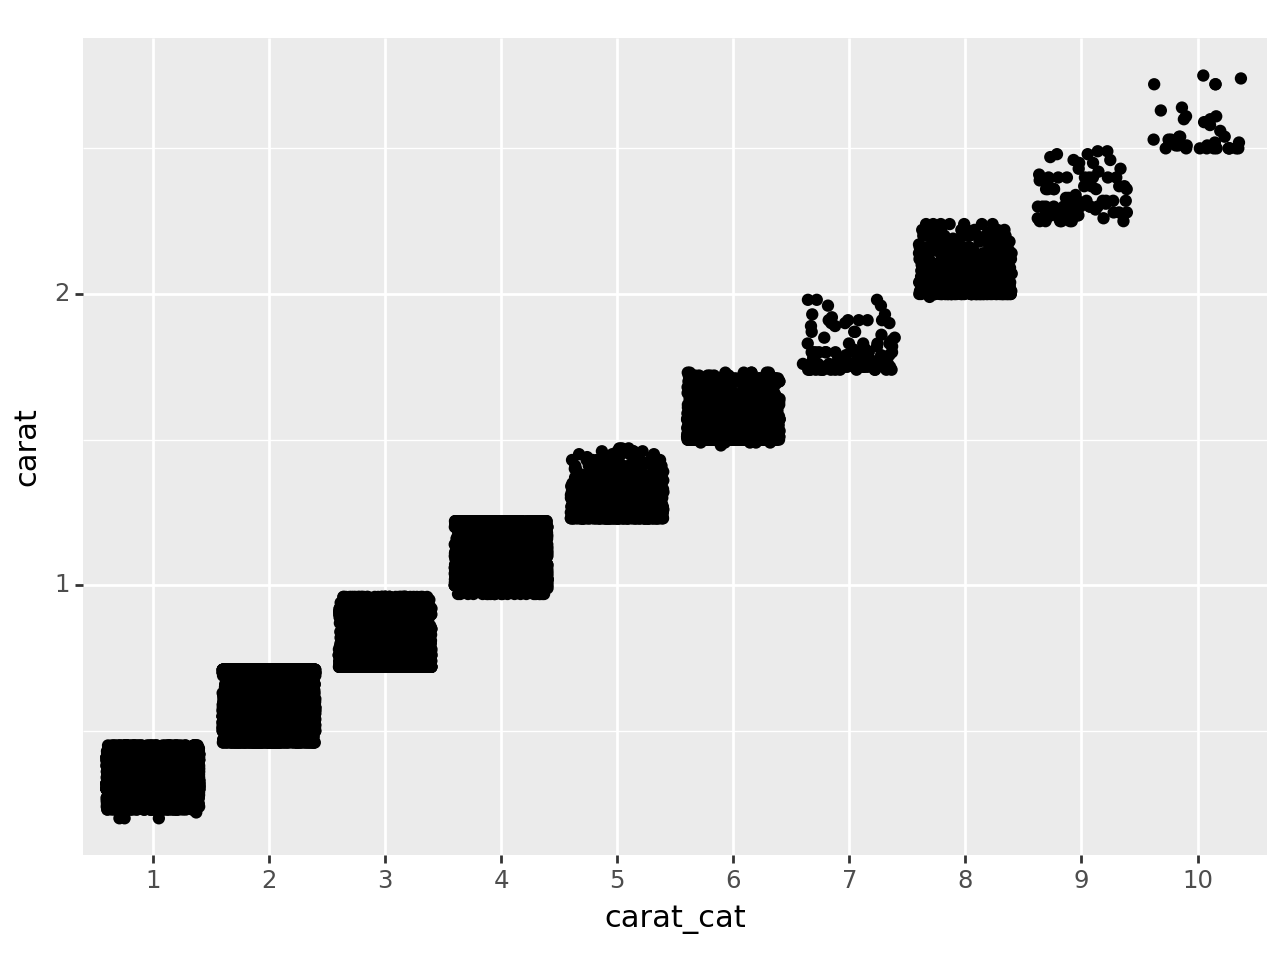

<Figure Size: (640 x 480)>

In [ ]:
smaller_FI.loc[:,'carat_cat'] = ...
# Check that you do it correctly
ggplot(smaller_FI, aes(x='carat_cat',y='carat')) + geom_jitter(height=0)

### Q7b - Boxplot of `price`, `cut`, and `carat_cat`
- Finally, plot a boxplot where x is `carat_cat`, y is `price`, and fill is `cut`
- Do some additional steps to make your graph easy to read. You may find `scale_fill_manual` useful. ([documentation](https://plotnine.org/reference/scale_fill_manual.html))

In [ ]:
g_p_cut_carat = ...
print(g_p_cut_carat)

- You should see that medain price of ideal diamonds are higher or about the same across all carat categories.

# Submission
- File -> Download -> Download .ipynb
- Upload to MS Teams